In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Path ke folder dataset
dataset_dir = '/content/drive/MyDrive/PROJECT/WORKSHOP ITTODAY IPB/sayuran'

undersampling kelas "FreshCucumber" dan "RottenCucumber"

In [28]:
# Membuat folder baru untuk menyimpan dataset hasil undersampling
import os
undersampled_dataset_dir = '/content/drive/MyDrive/PROJECT/WORKSHOP ITTODAY IPB/undersampled_dataset'
os.makedirs(undersampled_dataset_dir, exist_ok=True)


# Mendapatkan kelas dan jumlah gambar dari setiap kelas
class_folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

# Identifikasi jumlah gambar pada masing-masing kelas
class_counts = {}
for class_folder in class_folders:
    class_path = os.path.join(dataset_dir, class_folder)
    class_counts[class_folder] = len(os.listdir(class_path))

# Tentukan jumlah gambar kelas minoritas (minimal)
min_class_count = min(class_counts.values())

# Tentukan target jumlah gambar minimal yang diinginkan
target_classes = ['FreshCucumber', 'RottenCucumber']
target_class_count = 11



# Mendapatkan semua kelas dari dataset
class_folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

for class_folder in class_folders:
    class_path = os.path.join(dataset_dir, class_folder)
    images = os.listdir(class_path)

    # Jika ini adalah salah satu kelas yang akan di-undersample
    if class_folder in target_classes:
        # Lakukan undersampling hanya jika gambar lebih dari target_class_count
        if len(images) > target_class_count:
            undersampled_images = np.random.choice(images, size=target_class_count, replace=False)
        else:
            undersampled_images = images  # Jika lebih sedikit, gunakan semua gambar

        # Copy gambar yang sudah di-undersample ke folder baru
        target_class_path = os.path.join(undersampled_dataset_dir, class_folder)
        os.makedirs(target_class_path, exist_ok=True)

        for img in undersampled_images:
            source_img_path = os.path.join(class_path, img)
            target_img_path = os.path.join(target_class_path, img)
            shutil.copyfile(source_img_path, target_img_path)
    else:
        # Copy semua gambar untuk kelas lainnya tanpa undersampling
        target_class_path = os.path.join(undersampled_dataset_dir, class_folder)
        os.makedirs(target_class_path, exist_ok=True)
        for img in images:
            source_img_path = os.path.join(class_path, img)
            target_img_path = os.path.join(target_class_path, img)
            shutil.copyfile(source_img_path, target_img_path)

print("Undersampling selesai pada kelas 'FreshCucumber' dan 'RottenCucumber'. Dataset disimpan di:", undersampled_dataset_dir)

# Setelah itu, buat ImageDataGenerator baru menggunakan dataset hasil undersampling
undersampled_train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = undersampled_train_datagen.flow_from_directory(
    undersampled_dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = undersampled_train_datagen.flow_from_directory(
    undersampled_dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Undersampling selesai pada kelas 'FreshCucumber' dan 'RottenCucumber'. Dataset disimpan di: /content/drive/MyDrive/PROJECT/WORKSHOP ITTODAY IPB/undersampled_dataset
Found 56 images belonging to 10 classes.
Found 12 images belonging to 10 classes.


In [29]:
# Pra-pemrosesan gambar
image_size = (224, 224)  # Ubah sesuai kebutuhan Anda
batch_size = 256

# Pembagian data train dan test
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [30]:
class_names = train_generator.class_indices
print(class_names)

{'FreshBellpepper': 0, 'FreshCarrot': 1, 'FreshCucumber': 2, 'FreshPotato': 3, 'FreshTomato': 4, 'RottenBellpepper': 5, 'RottenCarrot': 6, 'RottenCucumber': 7, 'RottenPotato': 8, 'RottenTomato': 9}


In [43]:
# Membangun model CNN
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Melatih model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 25
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 21s/step - accuracy: 0.1111 - loss: 22.7375 - val_accuracy: 0.1667 - val_loss: 22.2380
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 16s/step - accuracy: 0.1984 - loss: 16.8139 - val_accuracy: 0.1667 - val_loss: 2.3228
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 16s/step - accuracy: 0.1865 - loss: 2.2452 - val_accuracy: 0.3333 - val_loss: 2.2561
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 16s/step - accuracy: 0.3353 - loss: 2.1729 - val_accuracy: 0.4167 - val_loss: 1.7299
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 14s/step - accuracy: 0.5699 - loss: 1.5243 - val_accuracy: 0.3333 - val_loss: 2.2337
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 19s/step - accuracy: 0.3234 - loss: 1.7190 - val_accuracy: 0.7500 - val_loss: 1.6152
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 13s/step - accuracy: 0.6801 - loss: 1.1057 - val_accuracy: 0.5000 - val_loss: 1.4997
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 16s/step - accuracy: 0.6885 - loss: 0.8349 - val_accuracy: 0.5833 - val_loss: 1.87

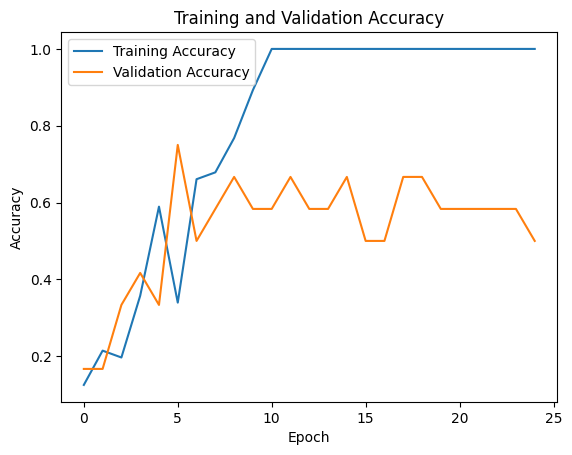

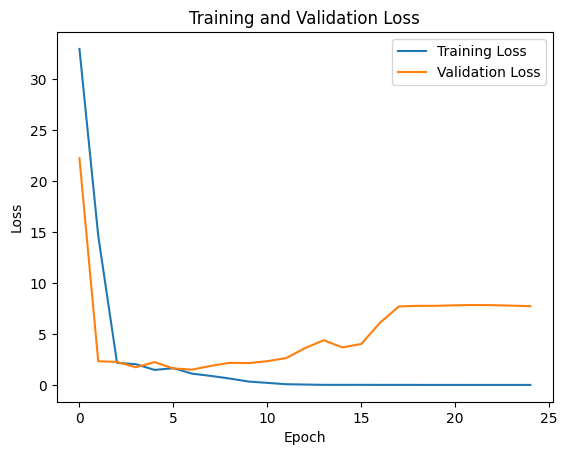

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 7.7217
Test Loss: 7.721667766571045, Test Accuracy: 0.5


In [44]:
# Visualisasi akurasi dan loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi model pada subset test
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

In [45]:
# Prediksi menggunakan model untuk satu gambar
sample_image_path = '/content/drive/MyDrive/PROJECT/WORKSHOP ITTODAY IPB/sayuran/FreshBellpepper/freshPepper (141).jpg'  # Ganti dengan path gambar yang ingin diprediksi
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=image_size)
sample_image_array = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image_array = np.expand_dims(sample_image_array, axis=0)
sample_image_array = sample_image_array / 255.0  # Normalisasi

predictions = model.predict(sample_image_array)
class_index = np.argmax(predictions[0])
class_name = train_generator.class_indices
for key, value in class_name.items():
    if value == class_index:
        class_name = key

print(f'Predicted class: {class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Predicted class: FreshBellpepper


In [46]:
# Prediksi menggunakan model untuk satu gambar
sample_image_path = '/content/drive/MyDrive/PROJECT/WORKSHOP ITTODAY IPB/Bellpepper.jpg'  # Ganti dengan path gambar yang ingin diprediksi
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=image_size)
sample_image_array = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image_array = np.expand_dims(sample_image_array, axis=0)
sample_image_array = sample_image_array / 255.0  # Normalisasi

predictions = model.predict(sample_image_array)
class_index = np.argmax(predictions[0])
class_name = train_generator.class_indices
for key, value in class_name.items():
    if value == class_index:
        class_name = key

print(f'Predicted class: {class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Predicted class: FreshTomato
